In [ ]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing path
import os

# for model explanation
import shap

In [6]:
data = pd.read_csv('heart.csv')
data.shape

(303, 14)

In [9]:
data.head(302)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [8]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
features = list(data.columns)

for feature in range(len(features)):
    print("Column {0} in the dataset is {1}".format(feature+1, features[feature].title()))

Column 1 in the dataset is Age
Column 2 in the dataset is Sex
Column 3 in the dataset is Cp
Column 4 in the dataset is Trestbps
Column 5 in the dataset is Chol
Column 6 in the dataset is Fbs
Column 7 in the dataset is Restecg
Column 8 in the dataset is Thalach
Column 9 in the dataset is Exang
Column 10 in the dataset is Oldpeak
Column 11 in the dataset is Slope
Column 12 in the dataset is Ca
Column 13 in the dataset is Thal
Column 14 in the dataset is Target


In [10]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [11]:
data[data.duplicated() == True] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
data.drop_duplicates(inplace=True)

n_rows, n_cols = data.shape
print(f"After removing duplicate data we now have {n_rows} data in domain.")

After removing duplicate data we now have 302 data in domain.


In [15]:
profile = pandas_profiling.ProfileReport(data)
profile

In [16]:
data.groupby('target').size()

target
0    138
1    164
dtype: int64

In [22]:
no_disease = len(data[data.target == 0])
with_disease = len(data[data.target == 1])
print(f"The percentage of disease patients within the dataset is {round((with_disease/len(data.target)), 2)*100}% and patients diagnosed with no heart disease is {round((no_disease/len(data.target)), 2)*100}% .")

The percentage of disease patients within the dataset is 54.0% and patients diagnosed with no heart disease is 46.0% .


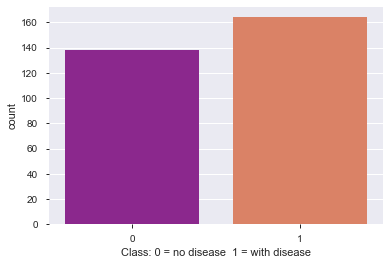

In [50]:
sns.countplot(x='target', data= data, palette='plasma')
plt.xlabel("Class:" " 0 = no disease " " 1 = with disease")
plt.show()

In [47]:
 male_g  = len(data[data.sex == 1])
female_g = len(data[data.sex == 0])

print("There exists {0} male subjects and {1} female subjects which cumputes to {2}% for males and {3}% for females.".format(male_g, female_g, round((male_g/len(data.sex)), 2)*100, round((female_g/len(data.sex)), 2)*100))

There exists 206 male subjects and 96 female subjects which cumputes to 68.0% for males and 32.0% for females.


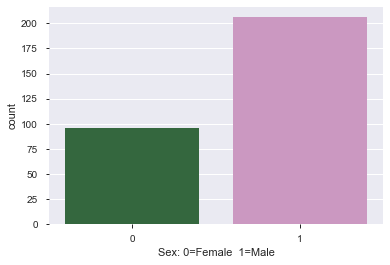

In [55]:
sns.countplot(x='sex', data=data, palette='cubehelix')
plt.xlabel("Sex: 0=Female "" 1=Male")
plt.show()

In [56]:
gender_impact = pd.crosstab(data['sex'], data['target'])
gender_impact

target,0,1
sex,,
0,24,72
1,114,92


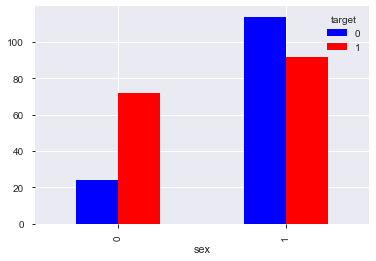

In [66]:
gender_impact.plot(kind='bar', stacked=False, color=["BLUE", "RED"])

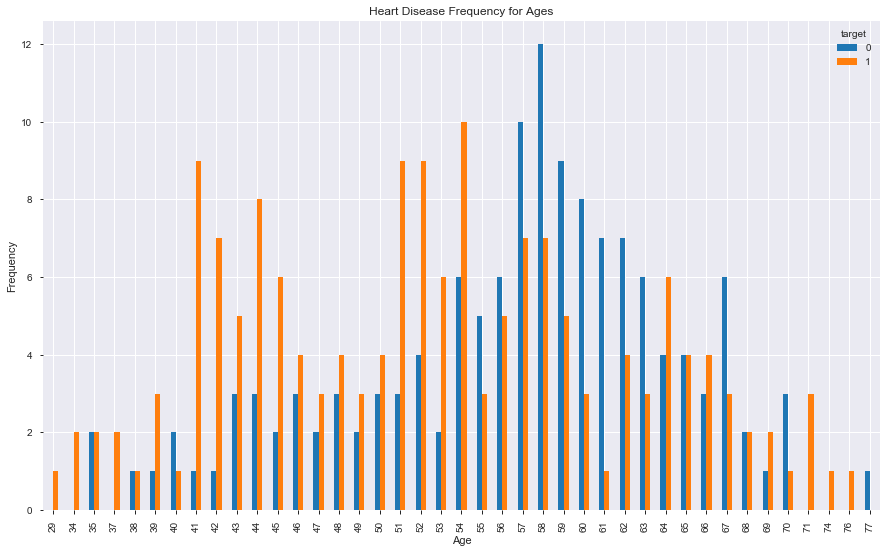

In [75]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,9))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

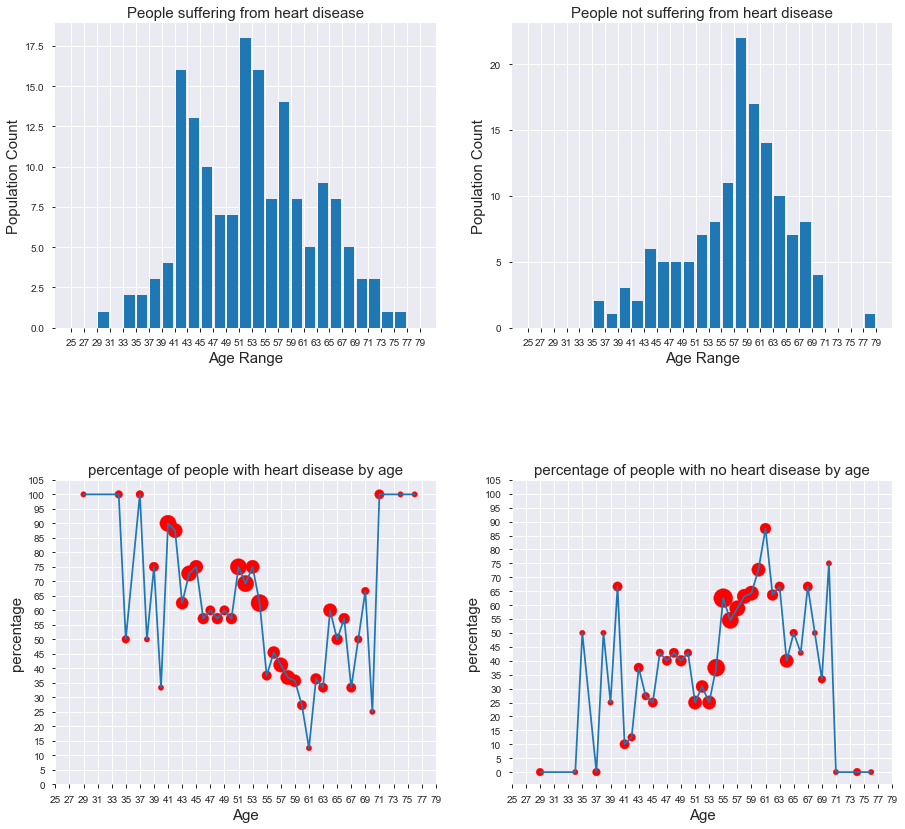

In [86]:
x = data.groupby(['age','target']).agg({'sex':'count'})
y = data.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z
bin_x = range(25,80,2)

fig, axes = plt.subplots(2,2, figsize = (15,14))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(data[data['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=15)

axes[0,1].hist(data[data['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=15)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'red')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('percentage',fontsize=15)
axes[1,0].set_title('percentage of people with heart disease by age',fontsize=15)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(0,level=1).sex)*30,edgecolors = 'r',c = 'red')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('percentage',fontsize=15)
axes[1,1].set_title('percentage of people with no heart disease by age',fontsize=15)

plt.show()